In [1]:
import numpy as np
import matplotlib as plt
import pandas as pd
import seaborn as sns
import scipy

In [2]:
# read csv
filePath = '../data/CleanSkyrimData.csv'
SkyrimWeaponsData = pd.read_csv(filePath)
print(SkyrimWeaponsData.shape)

(263, 8)


We have 239 rows and 9 cols

In [3]:
print(SkyrimWeaponsData.Type.unique())
print(SkyrimWeaponsData.Type.unique().shape)

['Battleaxe' 'Dagger' 'Mace' 'Sword' 'War Axe' 'Greatsword' 'Warhammer'
 'Bow' 'Crossbow']
(9,)


We have 12 types of weapons in the original data, we can discard silverware, arrows and bolts for now

In [4]:
SkyrimWeaponsData = SkyrimWeaponsData.loc[(SkyrimWeaponsData['Type'] != 'Arrow') & (SkyrimWeaponsData['Type'] != 'Bolt') & (SkyrimWeaponsData['Type'] != 'Silverware')]
SkyrimWeaponsData

,Unnamed: 0,Name,Damage,Weight,Gold,Upgrade,Type,Category
0,0,Ancient Nord Battle Axe,18,22.0,28,Steel Ingot,Battleaxe,Two-Handed
1,1,Daedric Battleaxe,25,27.0,2750,Ebony Ingot,Battleaxe,Two-Handed
2,2,Dragonbone Battleaxe,26,30.0,3000,Dragon Bone,Battleaxe,Two-Handed
3,3,Drainblood Battleaxe,21,5.0,266,No Upgrade,Battleaxe,Two-Handed
4,4,Dwarven Battleaxe,20,23.0,300,Dwarven Metal Ingot,Battleaxe,Two-Handed
...,...,...,...,...,...,...,...,...
258,260,Zephyr DG,12,10.0,670,Dwarven Metal Ingot,Bow,Archery
259,281,Crossbow,19,14.0,120,Steel Ingot,Crossbow,Archery
260,282,Dwarven Crossbow,22,20.0,350,Dwarven metal ingot,Crossbow,Archery
261,283,Enhanced Crossbow,19,15.0,200,Steel Ingot,Crossbow,Archery


We now have 263 rows and 9 columns

In [5]:
print(SkyrimWeaponsData.Damage.describe())

count    263.000000
mean      13.095057
std        5.633401
min        1.000000
25%        9.000000
50%       12.000000
75%       17.000000
max       28.000000
Name: Damage, dtype: float64


In [6]:
weakestWeapon = SkyrimWeaponsData.sort_values(by='Damage')
weakestWeapon = weakestWeapon.iloc[:10]
weakestWeapon

,Unnamed: 0,Name,Damage,Weight,Gold,Upgrade,Type,Category
161,161,Illusory War Axe,1,14.0,15,No Upgrade,War Axe,One-Handed
126,126,Phantom Sword,1,0.0,0,No Upgrade,Sword,One-Handed
143,143,Wooden Sword,2,3.0,25,Firewood,Sword,One-Handed
34,34,Iron Dagger,4,2.0,10,Iron Ingot,Dagger,One-Handed
45,45,Steel Dagger,5,2.5,18,Steel Ingot,Dagger,One-Handed
175,175,Poacher's Axe,5,10.0,32,Steel Ingot,War Axe,One-Handed
42,42,Shiv,5,2.0,5,No Upgrade,Dagger,One-Handed
41,41,Rundi's Dagger,5,2.5,18,Steel Ingot,Dagger,One-Handed
171,171,Notched Pickaxe,5,10.0,303,Iron Ingot,War Axe,One-Handed
180,180,Woodcutter's Axe,5,10.0,5,No Upgrade,War Axe,One-Handed


In [7]:
strongestWeapon = SkyrimWeaponsData.sort_values(by='Damage', ascending=False)
strongestWeapon = strongestWeapon.iloc[:10]
strongestWeapon

,Unnamed: 0,Name,Damage,Weight,Gold,Upgrade,Type,Category
206,208,Dragonbone Warhammer,28,33.0,4275,Dragon Bone,Warhammer,Two-Handed
203,205,Daedric Warhammer,27,31.0,4000,Ebony Ingot,Warhammer,Two-Handed
20,20,Tsun's Battleaxe,27,36.0,1000,No Upgrade,Battleaxe,Two-Handed
215,217,Stalhrim Warhammer,26,29.0,2850,Stalhrim,Warhammer,Two-Handed
2,2,Dragonbone Battleaxe,26,30.0,3000,Dragon Bone,Battleaxe,Two-Handed
21,21,Wuuthrad,25,25.0,2000,No Upgrade,Battleaxe,Two-Handed
246,248,Karliah's Bow,25,9.0,5,No Upgrade,Bow,Archery
208,210,Ebony Warhammer,25,30.0,1725,Ebony Ingot,Warhammer,Two-Handed
219,221,Volendrung,25,26.0,1843,Ebony Ingot,Warhammer,Two-Handed
1,1,Daedric Battleaxe,25,27.0,2750,Ebony Ingot,Battleaxe,Two-Handed


From the previous data we can see that most of the weak weapons are one handed and most of the stronger weapons are 2 handed

We also notice that swords and daggers are common in the weak weapons caregory and warhammers and battleaxes are more common in the strong weapons category

<Axes: xlabel='Category', ylabel='Damage'>

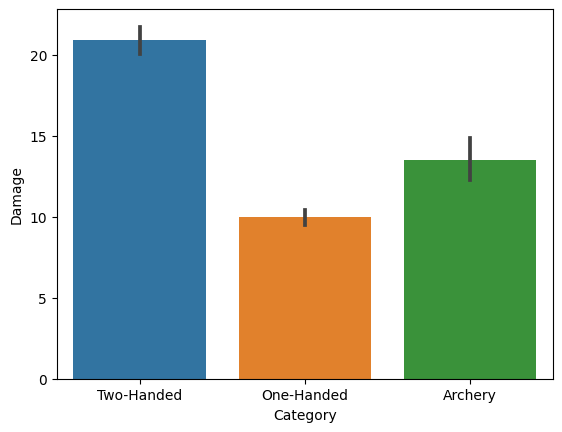

In [8]:
plt.pyplot.Figure(figsize=(10,40))
sns.barplot(x=SkyrimWeaponsData['Category'], y=SkyrimWeaponsData['Damage'])

We can see that 2 handed weapons are superior in terms of damage and one handed weapons are not that great

<Axes: xlabel='Type', ylabel='Damage'>

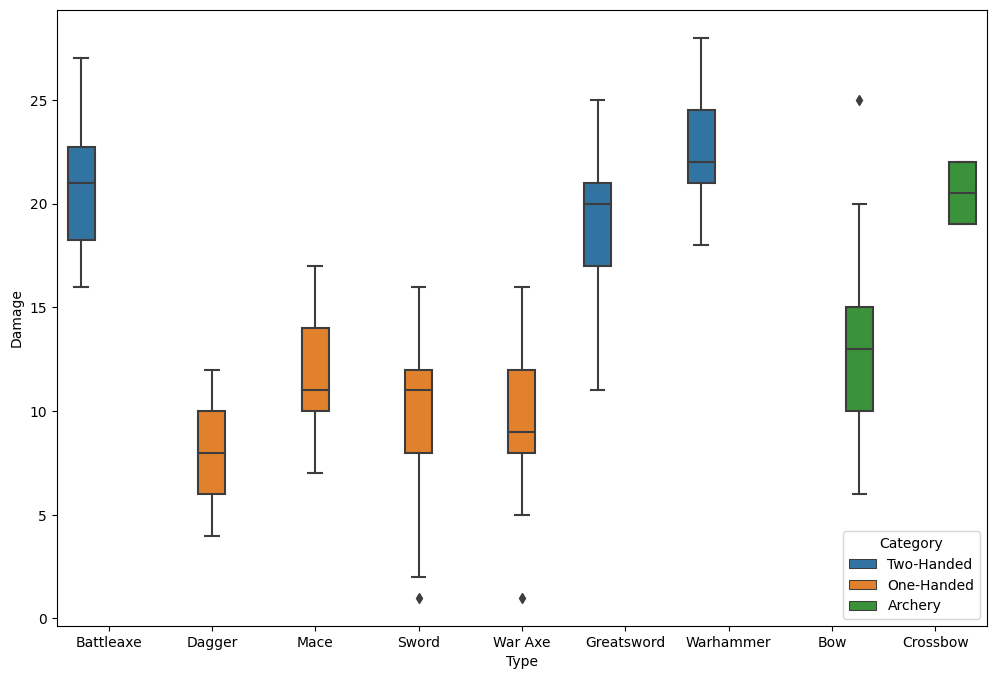

In [9]:
plt.rcParams['figure.figsize'] = 12,8
sns.boxplot(x=SkyrimWeaponsData['Type'], y=SkyrimWeaponsData['Damage'], hue=SkyrimWeaponsData['Category'])

Boxplots allow us to see that 2 handed weapons have a high mean damage. Bows have much lower mean damage but theres an outlier which rivals the damage of some warhammers. One handed weapons have low mean damages with swords and war axes having outliers which bring their means down by a lot

Heaviest Weapons


In [10]:
SkyrimWeaponsData.sort_values('Weight', ascending=False)

,Unnamed: 0,Name,Damage,Weight,Gold,Upgrade,Type,Category
20,20,Tsun's Battleaxe,27,36.0,1000,No Upgrade,Battleaxe,Two-Handed
206,208,Dragonbone Warhammer,28,33.0,4275,Dragon Bone,Warhammer,Two-Handed
203,205,Daedric Warhammer,27,31.0,4000,Ebony Ingot,Warhammer,Two-Handed
2,2,Dragonbone Battleaxe,26,30.0,3000,Dragon Bone,Battleaxe,Two-Handed
208,210,Ebony Warhammer,25,30.0,1725,Ebony Ingot,Warhammer,Two-Handed
...,...,...,...,...,...,...,...,...
34,34,Iron Dagger,4,2.0,10,Iron Ingot,Dagger,One-Handed
42,42,Shiv,5,2.0,5,No Upgrade,Dagger,One-Handed
22,22,Alessandra's Dagger,5,1.0,10,No Upgrade,Dagger,One-Handed
101,101,Ghostblade,8,1.0,300,3 Ectoplasm,Sword,One-Handed


We can the heaview weapons have a mean damage above 30 and are mostly 2 handed

<Axes: xlabel='Weight', ylabel='Damage'>

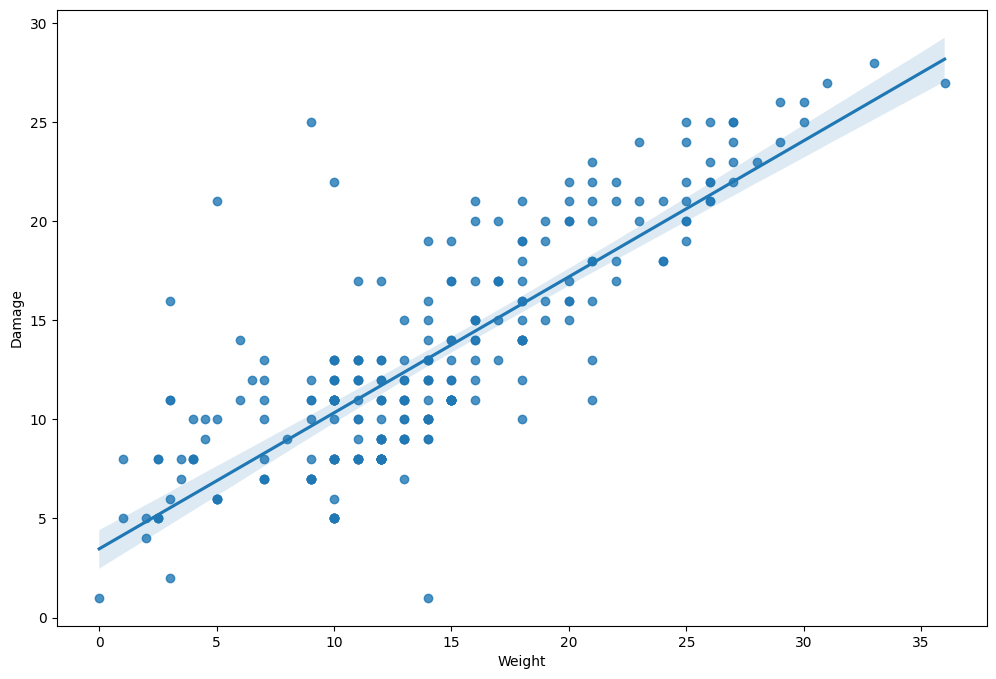

In [11]:
sns.regplot(x=SkyrimWeaponsData['Weight'], y=SkyrimWeaponsData['Damage'])

<Axes: xlabel='Damage', ylabel='Weight'>

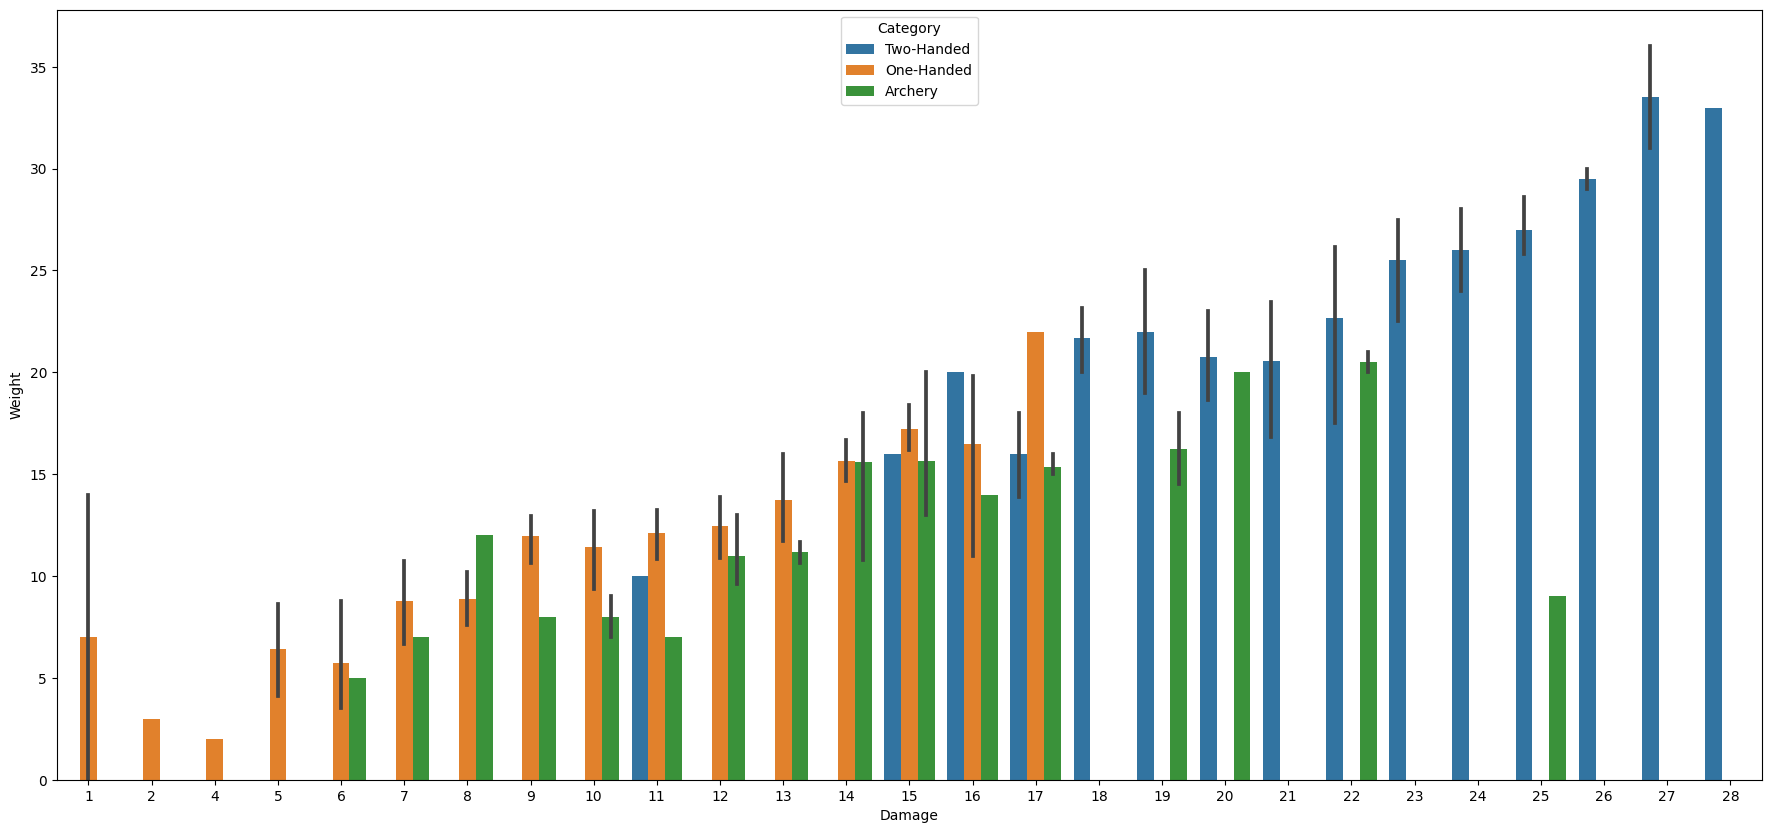

In [12]:
plt.rcParams['figure.figsize'] = 22,10
sns.barplot(y=SkyrimWeaponsData['Weight'], x=SkyrimWeaponsData['Damage'], hue=SkyrimWeaponsData['Category'])

We can see a clear relation between weight, type and damage. two handed weapons have more weight and more damage than bows and one handed weapons

<Axes: xlabel='Upgrade', ylabel='count'>

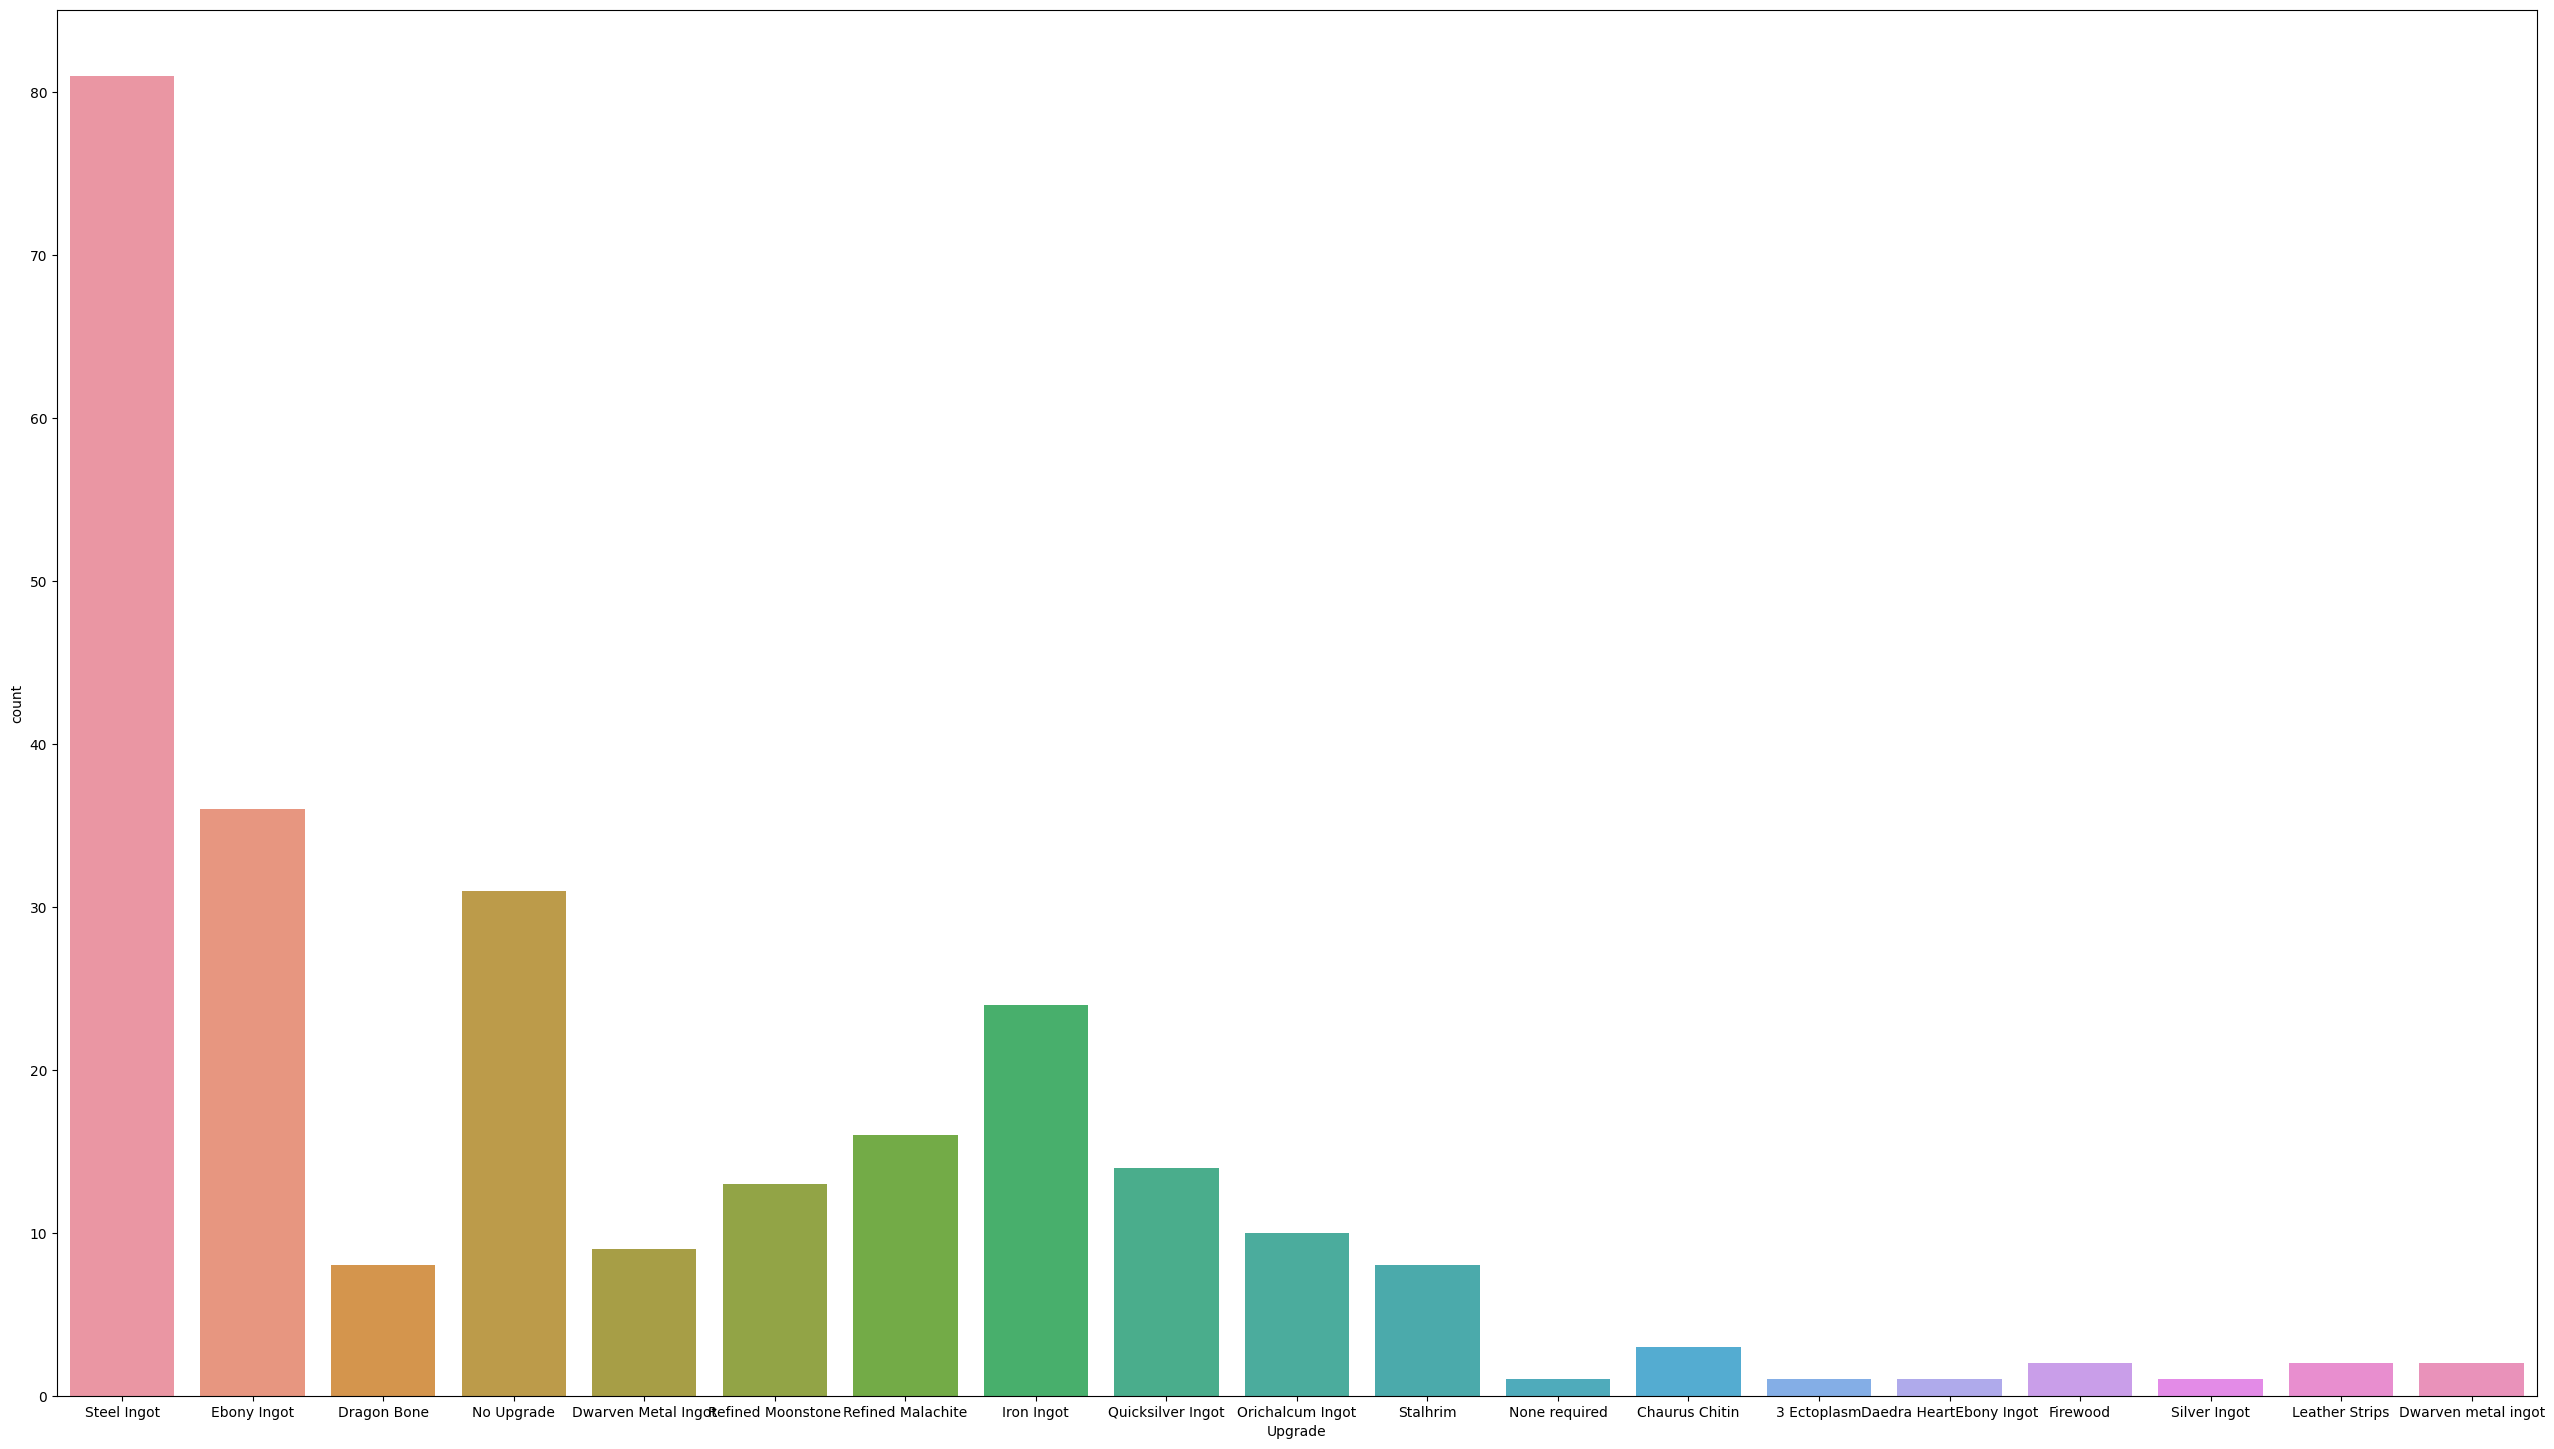

In [13]:
plt.rcParams['figure.figsize'] = 32,18
sns.countplot(x='Upgrade', data=SkyrimWeaponsData)

most of the weapons can be upgraded with steel, ebony and iron ingots

<Axes: xlabel='Damage', ylabel='Gold'>

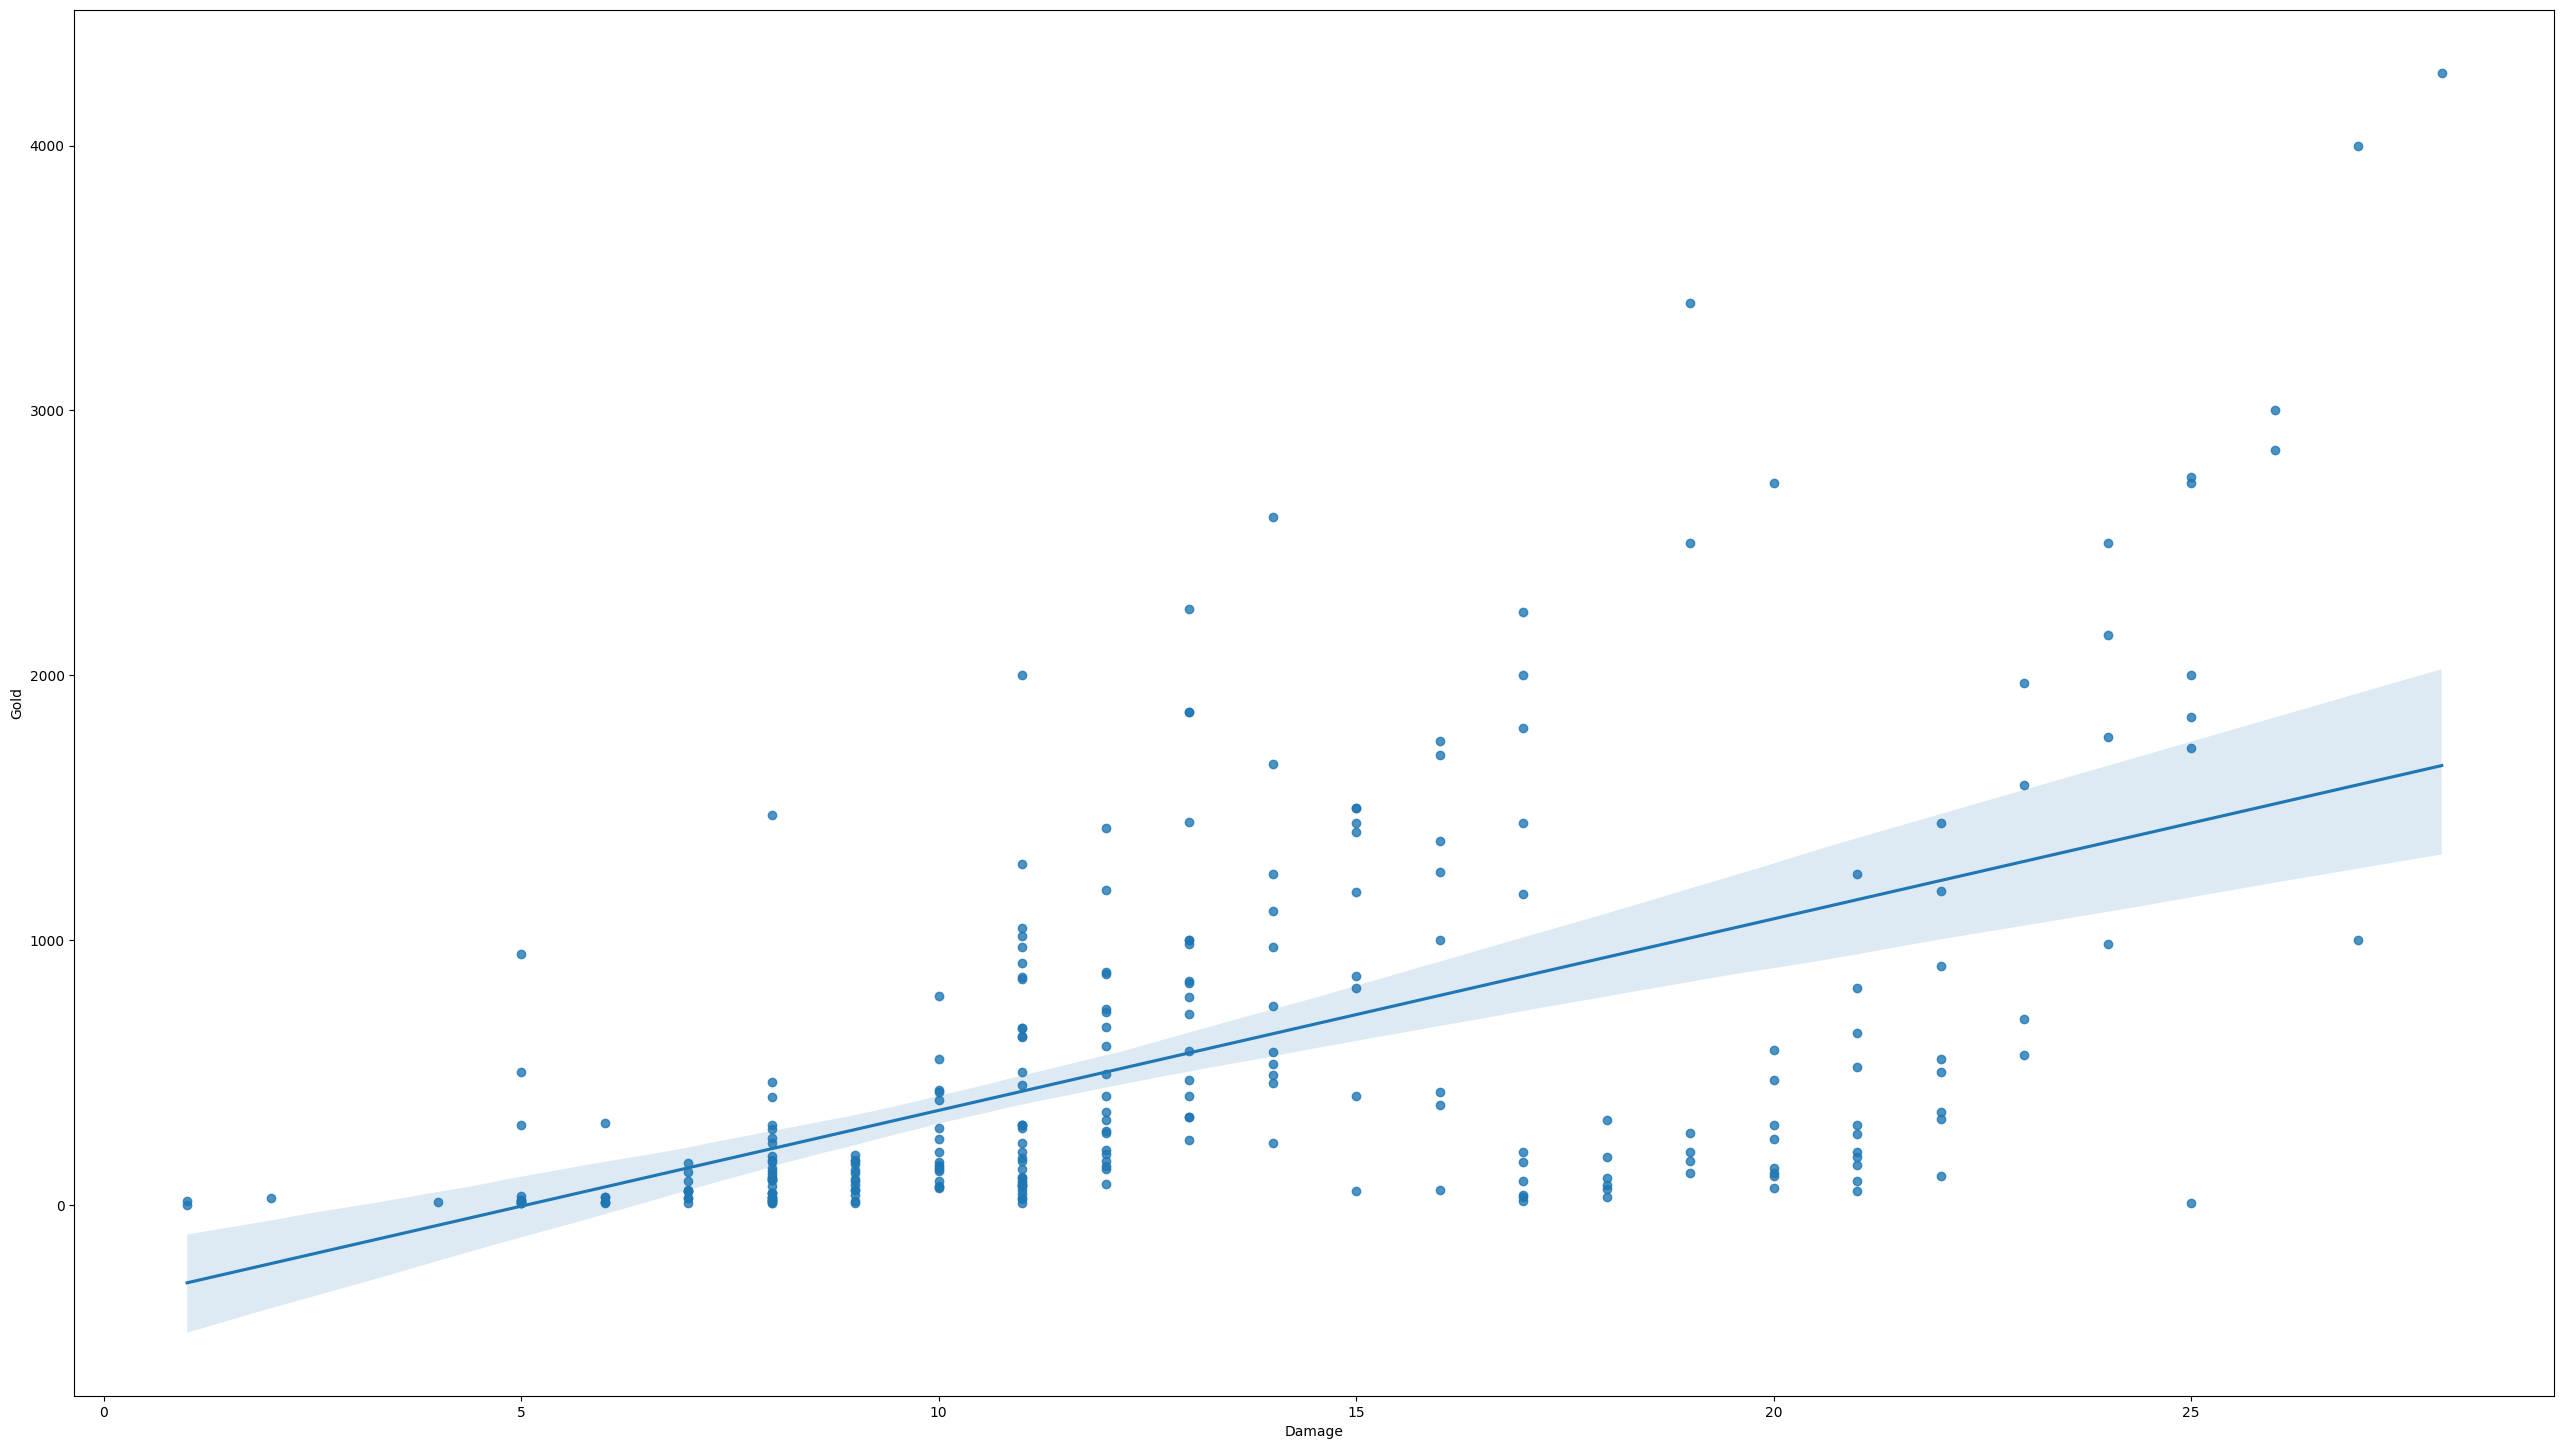

In [14]:
sns.regplot(x=SkyrimWeaponsData['Damage'], y=SkyrimWeaponsData['Gold'])

<Axes: xlabel='Type', ylabel='Gold'>

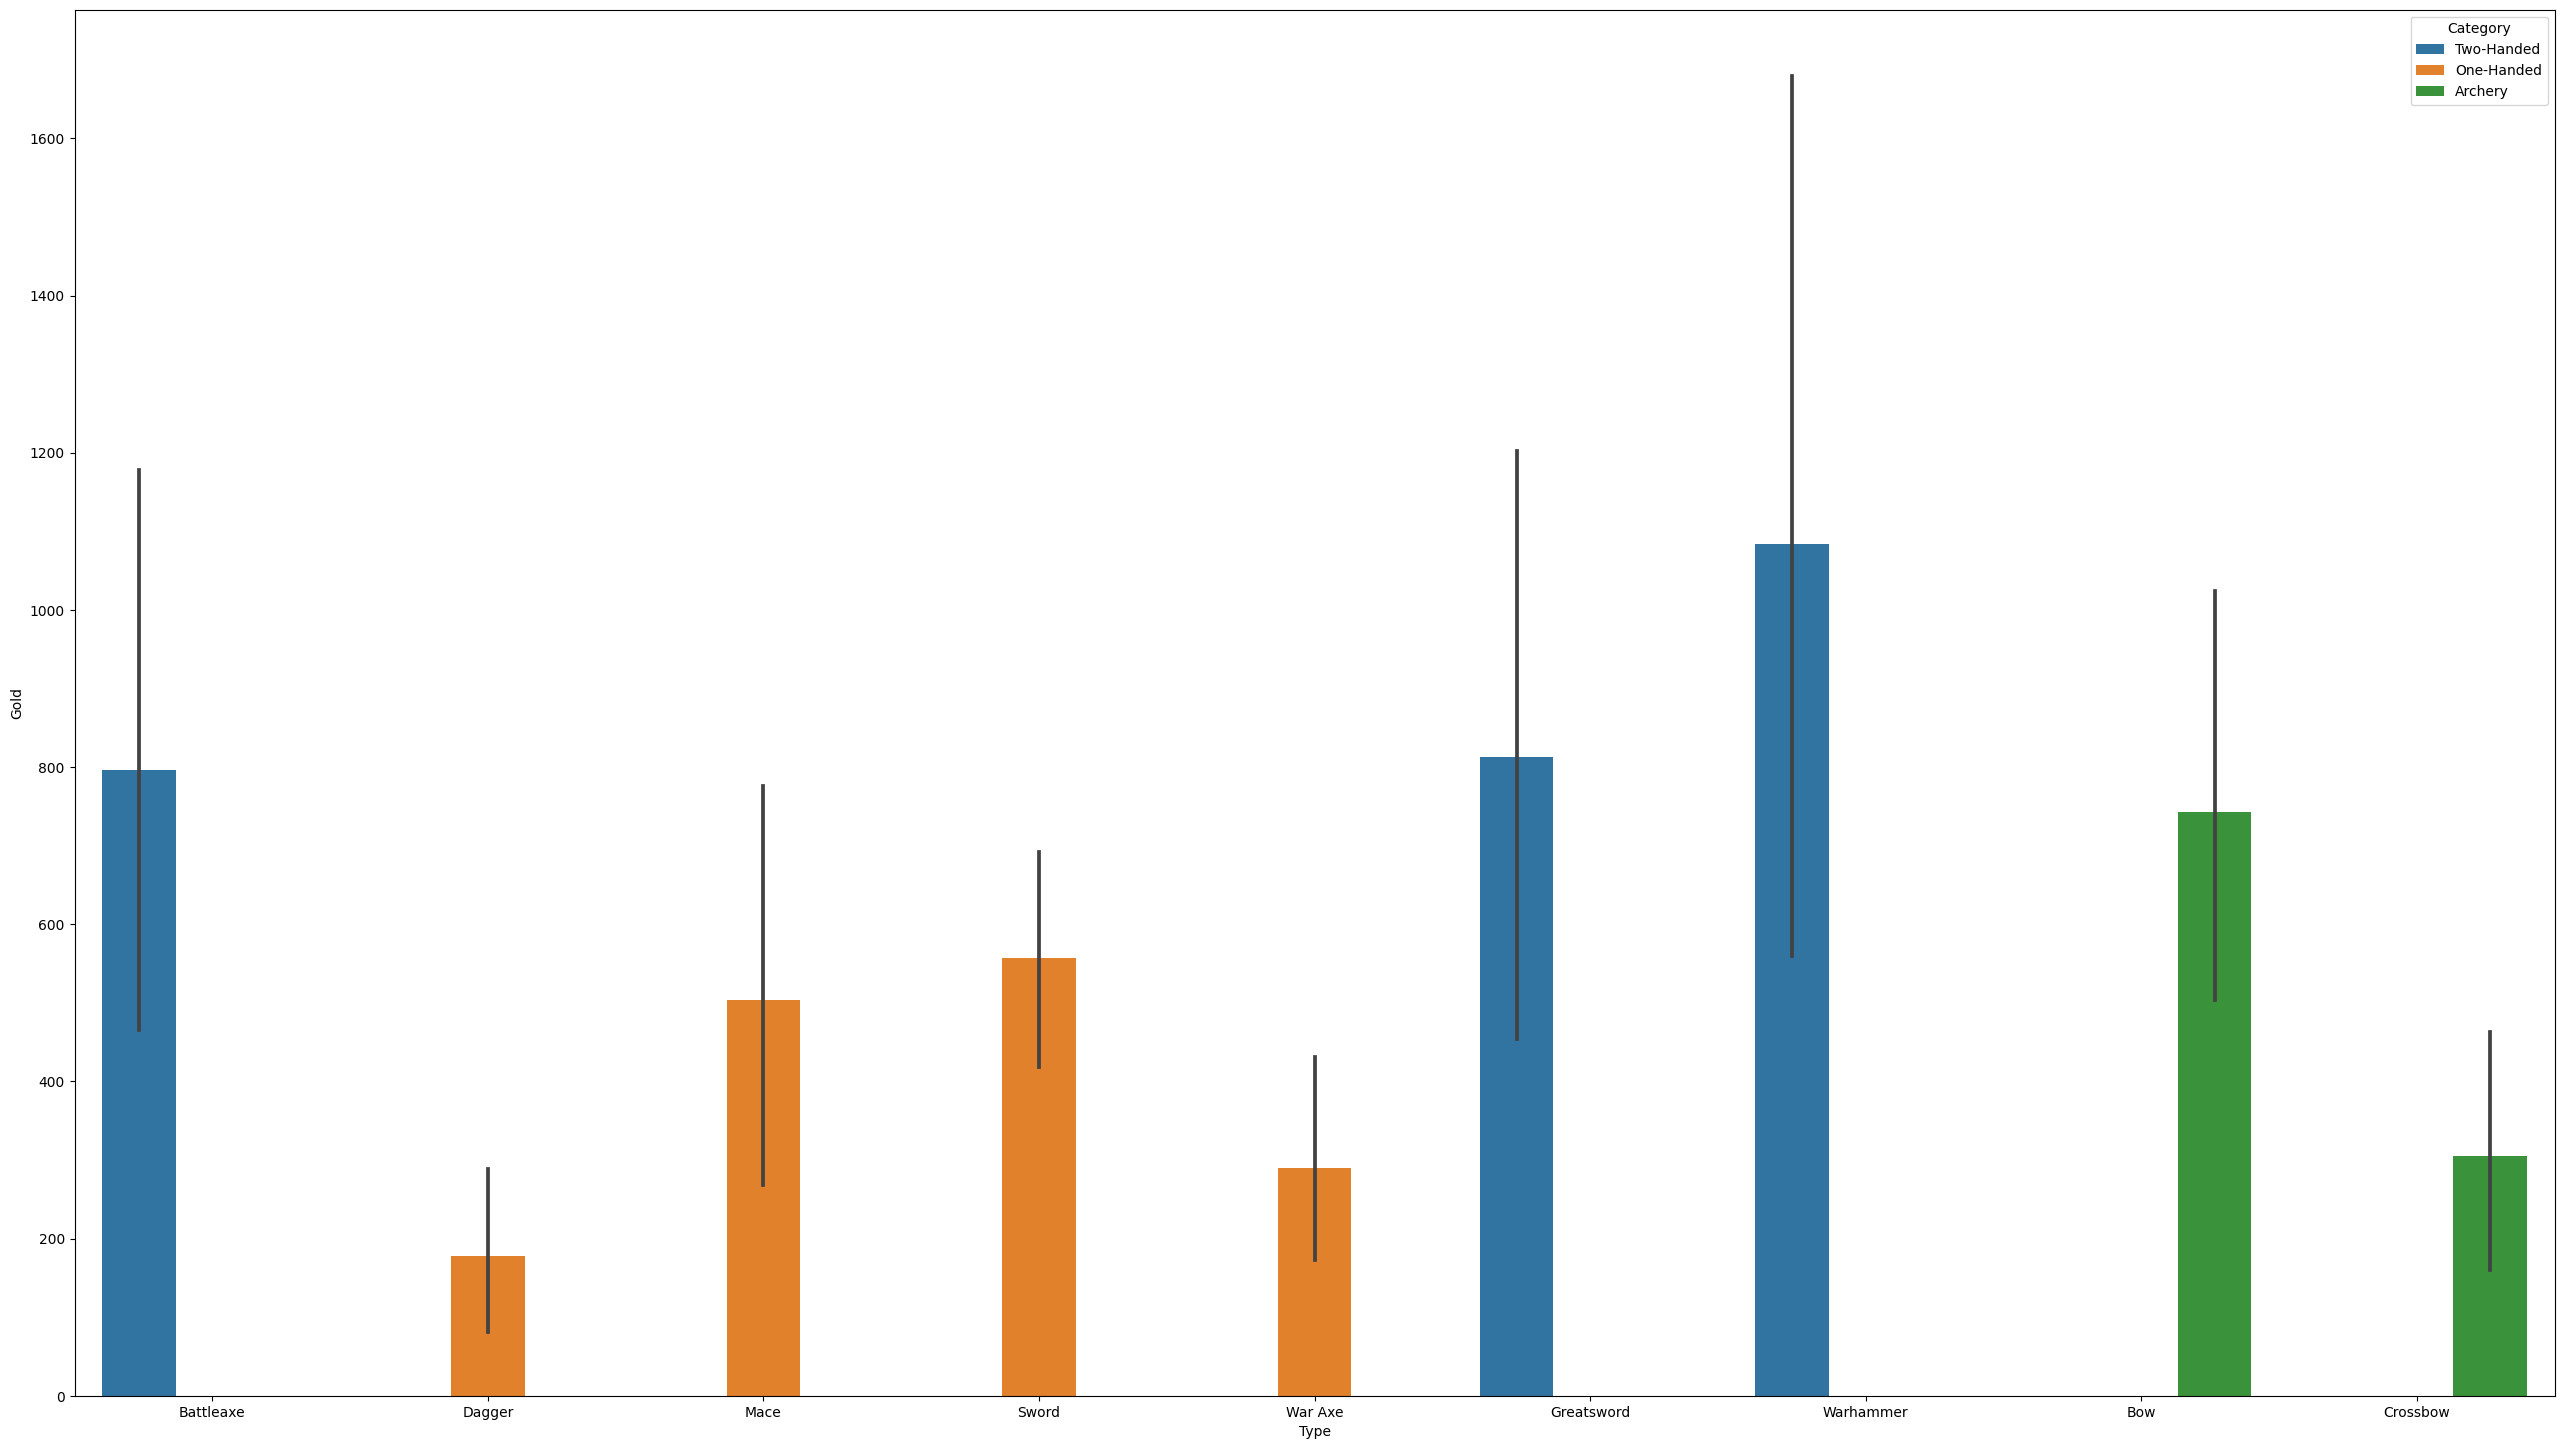

In [15]:
sns.barplot(x=SkyrimWeaponsData['Type'], y=SkyrimWeaponsData['Gold'], hue=SkyrimWeaponsData['Category'])

We can see that weapons that do more dmaage have more weight and sell for more gold

P_value of 0.99 is > 0.05 so null hypothesis is true and we can conclude that gold and damage are related

**Conclusions**:

    One handed weapons have the lowest base damage, followed by bows and Two handed weapons
    Warhammers had the highest base attack while Daggers had the lowest base attack
    Bows had an outlier 'Karliah's Bow' which had a base damage of 25 which is 3 lesser than the Dragonbone warhammer
    Two handed weapons costed more, weighed more and had higher base damage compared to bows and one handed weapons
    Most of the weapons can be upgraded by Steel ingots and Ebony ingots
    Weapons dealing more damage had much higher cost compared to weapons dealing lower damage
    Warhammers cost the most gold while Daggers cost the least
    The Chi Sq Test for Independence suggests that Weight and Damage are related
    In ammo types Arrows are the best and worst performing
    Arrows have a higher mean damage than bolts
    Bolts cost much more than arrows
    Silverware is concidered one handed and has terrible damage

|